In [2]:
from matplotlib import pyplot as plt
from utils.data import get_data
import os, numpy as np, seaborn as sns, pandas as pd

In [3]:
data = get_data()

In [ ]:
def plot_history(history, file):
    # Plot training & validation loss values
    #plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')

    first = np.gradient(history['loss'])
    second = np.gradient(first)
    elbow_index = np.where(np.diff(np.sign(second)) > 0)[0][0]
    training_end_index = np.where(np.diff(np.sign(first)) > 0)[0][0]
    plt.title(file)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.scatter(elbow_index, history['loss'][elbow_index], color='r')
    plt.text(elbow_index, history['loss'][elbow_index], 'Training slows down', color='r')

    plt.scatter(training_end_index, history['loss'][training_end_index], color='g')
    plt.text(training_end_index, history['loss'][training_end_index], 'Loss increase', color='g')


    # Plot training & validation accuracy values
    #plt.subplot(1, 2, 2)
    #plt.plot(history['accuracy'], label='Training Accuracy')
    #plt.plot(history['val_accuracy'], label='Validation Accuracy')
    #plt.title('Model Accuracy')
    #plt.xlabel('Epoch')
    #plt.ylabel('Accuracy')
    #plt.legend()

    #plt.tight_layout()
    plt.show()

In [ ]:
# Save and plot a boxplot showing the deviation in values for parameters
def boxplot(df):
    plt.boxplot(df.values, notch = True, vert = True, patch_artist = True, labels = df.columns)
    plt.title('Boxplot for parameters and target')
    plt.xlabel('Parameters')
    plt.ylabel('Observed values')

    plt.savefig('./png/boxplot.png')
    plt.show()

In [3]:
def histogram(df: pd.DataFrame, variable: str) -> None:
    plt.hist(df[variable], bins = 40)
    plt.title(variable + ' histogram')
    plt.ylabel('Occurrences')
    plt.xlabel('Value')
    plt.grid(True)

    plt.savefig('./outputs/png/histogram_' + variable + '.png')
    plt.show()
    return

In [ ]:
def completeHistogram(df) -> None:
    plt.figure(figsize=(20, 20))
    df = df.drop([f'e{i}' for i in range(140)] + ['Ri_01', 'Ri_12', 'Ri_02', 'N_01_real', 'N_12_real', 'N_02_real', 'N_01_imag', 'N_12_imag', 'N_02_imag', 'station_elevation', 'd', 'X', 'Y'], axis = 1)
    plt.hist(df, bins = 100, stacked = True, label = df.columns)
    plt.title('Stacked Histogram')
    plt.ylabel('Intensity')
    plt.xlabel('Value')
    plt.grid(True)
    plt.legend()

    plt.savefig('./outputs/png/histogram_stacked.png')
    plt.show()


In [ ]:
# Save and plot a correlation heatmap for the data.
def correlation_plot(df) -> None:
    df = df[df.f > 0]
    df['gust_factor'] = df.fg / df.f
    print(type(df.f.iloc[0]))
    print(min(df.gust_factor),max(df.gust_factor))
    correlation_matrix = df.corr()
    plt.figure(figsize=(20, 20))
    sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.4f')
    plt.title('Correlation Heatmap')
    plt.savefig('./outputs/png/correlation_heatmap.png')
    plt.show()

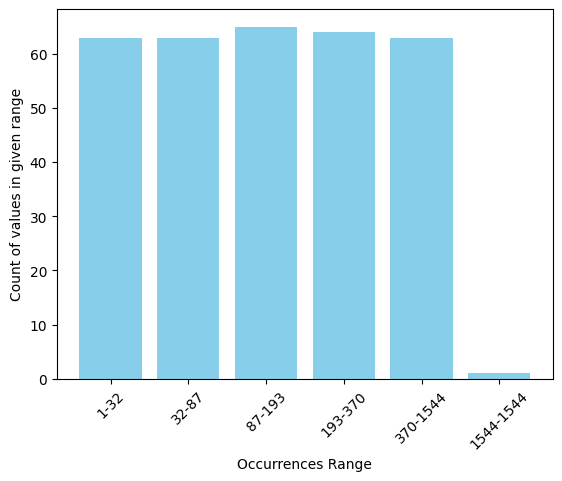

In [40]:
# Count occurrences of each unique value
value_counts = data['stod'].value_counts()

# Calculate quantiles to define ranges
n = 5
quantiles = [0] + [(i+1) / n for i in range(n)] + [1]  # Divide into n equal parts
ranges = [value_counts.quantile(q) for q in quantiles]

# Group occurrences
grouped_counts = {}

for i in range(len(ranges)-1):
    lower, upper = ranges[i], ranges[i+1]
    count = value_counts[(value_counts >= lower) & (value_counts <= upper)].count()
    grouped_counts[f'{lower:.0f}-{upper:.0f}'] = count
# Plot the graph
plt.bar(grouped_counts.keys(), grouped_counts.values(), color='skyblue')
plt.xlabel('Occurrences Range')
plt.ylabel('Count of values in given range')
plt.xticks(rotation=45)
plt.savefig('./outputs/png/station_occurrences.png')
plt.show()

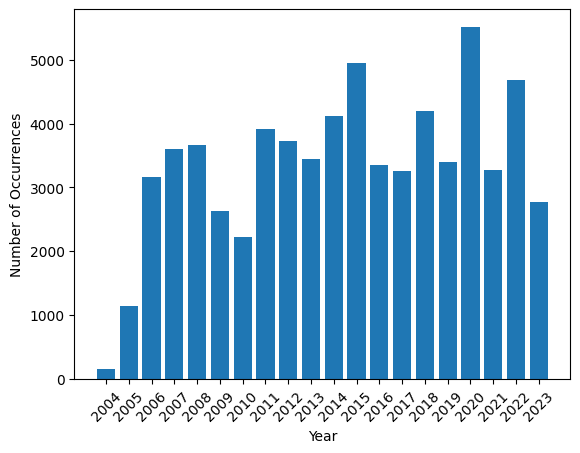

In [9]:
data['year'] = data.time.dt.year.astype(int)
year_counts = data.year.value_counts().sort_index()

# Plot the result
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Set x-axis ticks as integers
plt.xticks(year_counts.index.astype(int), rotation=45)
plt.savefig('./outputs/png/occurrences_by_year.png')
plt.show()